# **Продуктовый анализ YouTube-канала MrBeast**

#### **Цель** — проанализировать контент канала MrBeast и понять, какие факторы связаны с высокими просмотрами и вовлечённостью аудитории.

##### **Описание данных** — датасет ютуб-канала Mr Beast.
- `video_id` -	Уникальный ID видео на YouTube
- `channelTitle` -	Название канала (здесь — MrBeast)
- `title` -	Заголовок видео
- `description` -	Описание под видео
- `tags` -	Теги видео
- `publishedAt` -	Дата и время публикации видео (UTC)
- `pushblishDayName` - День недели, когда вышло видео
- `viewCount` -	Количество просмотров
- `likeCount` -	Количество лайков
- `commentCount` -	Количество комментариев
- `favouriteCount` - Избранное
- `duration` -	Длительность в формате ISO 8601 (`PT15M31S` = 15 минут 31 секунда)
- `durationSecs` -	Та же длительность, но в секундах
- `definition` -	Качество видео (`hd` / `sd`)
- `caption` -	Есть ли субтитры (`True` / `False`)
- `tagCount` -	Количество тегов
- `comments` -	Список топ-комментариев (строки внутри списка)

### **Загрузка данных**

In [1]:
pip install matplotlib seaborn plotly nbformat scipy --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from datetime import datetime
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

In [3]:
df = pd.read_csv(r"C:\Users\smeen\Desktop\мистер бист\VideoDetails.csv")
df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount,comments
0,jdMNoQE3mIQ,MrBeast,I Survived A Plane Crash,Thanks again to the Coast Guard for the lift!\...,NaN,2022-08-20 20:00:00+00:00,42003849.0,2087088.0,NaN,68069.0,PT8M14S,hd,False,Saturday,494.0,0,"['Subscribe! You could be in a video :D', 'hel..."
1,2isYuQZMbdU,MrBeast,"I Gave My 100,000,000th Subscriber An Island","🚀Launch a store on Shopify, I’ll buy from 100 ...",NaN,2022-08-04 19:59:59+00:00,65090668.0,3762729.0,NaN,225420.0,PT15M31S,hd,True,Thursday,931.0,0,['Here are my Shopify stores https://shopmrbea...
2,dZklZVaU4AI,MrBeast,"100,000,000 Subscriber Special","Set a reminder for Thursday, August 4th 4pm ES...",NaN,2022-07-31 21:00:01+00:00,20088769.0,1302211.0,NaN,91010.0,PT15S,hd,False,Sunday,15.0,0,"['The private island is public go watch it!', ..."
3,tVWWp1PqDus,MrBeast,"100 Girls Vs 100 Boys For $500,000",Giving away $25k on Current! Sign up and use m...,NaN,2022-07-23 20:00:09+00:00,73775726.0,2979131.0,NaN,131689.0,PT16M53S,hd,True,Saturday,1013.0,0,['If your primary language is English ignore t...
4,vaIgyRoUkQI,MrBeast,I Didn’t Eat Food For 30 Days,New Chocolate - https://feastables.com/\n\nSUB...,NaN,2022-07-02 20:00:02+00:00,51874612.0,2503329.0,NaN,101765.0,PT13M4S,hd,True,Saturday,784.0,0,['Obviously as I stated in the video multiple ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          727 non-null    object 
 1   channelTitle      727 non-null    object 
 2   title             727 non-null    object 
 3   description       725 non-null    object 
 4   tags              551 non-null    object 
 5   publishedAt       727 non-null    object 
 6   viewCount         727 non-null    float64
 7   likeCount         720 non-null    float64
 8   favouriteCount    0 non-null      float64
 9   commentCount      726 non-null    float64
 10  duration          727 non-null    object 
 11  definition        727 non-null    object 
 12  caption           727 non-null    bool   
 13  pushblishDayName  727 non-null    object 
 14  durationSecs      727 non-null    float64
 15  tagCount          727 non-null    int64  
 16  comments          726 non-null    object 
dt

**Вывод**:
- всего 727 записей
- названия столбцов приведем в порядок
- столбец с временем и датой приведем в корректный формат, в остальном формат верно указан
- колонка `favouriteCount` не содержит значений, это устаревшая метрика, поэтому можем удалить.

### **Предобработка данных**

Удалим ненужнюю колонку "Избранное"

In [5]:
df = df.drop('favouriteCount', axis=1)

Приведем колонку с датой в соответствующий формат

In [6]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

Исправим опечатку в названии столбца с днем недели публикации

In [7]:
df = df.rename(columns={'pushblishDayName': 'publishdayname'})

Приведем в порядок названия столбцов

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   video_id        727 non-null    object             
 1   channeltitle    727 non-null    object             
 2   title           727 non-null    object             
 3   description     725 non-null    object             
 4   tags            551 non-null    object             
 5   publishedat     727 non-null    datetime64[ns, UTC]
 6   viewcount       727 non-null    float64            
 7   likecount       720 non-null    float64            
 8   commentcount    726 non-null    float64            
 9   duration        727 non-null    object             
 10  definition      727 non-null    object             
 11  caption         727 non-null    bool               
 12  publishdayname  727 non-null    object             
 13  durationsecs    727 non-null    flo

Проверяем наличие пропусков

In [10]:
df.isna().sum()

video_id            0
channeltitle        0
title               0
description         2
tags              176
publishedat         0
viewcount           0
likecount           7
commentcount        1
duration            0
definition          0
caption             0
publishdayname      0
durationsecs        0
tagcount            0
comments            1
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

**Вывод**:
- удалили лишнюю колонку `favouriteCount`
- преобразовали колонку с датой в формате ISO 8601
- привели названия столбцов к нижнему регистру для удобства
- дубликатов нет
- есть пропуски, но мы решили их оставить, чтобы не искажать анализ данных.

### **Исследовательский анализ данных**

Проверим наличие аномалий с помощью описательной статистики

In [12]:
display(df[['viewcount', 'likecount', 'commentcount', 'durationsecs', 'tagcount']].describe())

,viewcount,likecount,commentcount,durationsecs,tagcount
count,7.270000e+02,7.200000e+02,726.000000,727.000000,727.000000
mean,2.362807e+07,6.981797e+05,30783.329201,1284.624484,7.917469
std,4.055891e+07,1.414940e+06,59407.963723,7397.059154,7.929532
min,2.088500e+04,4.800000e+02,80.000000,15.000000,0.000000
25%,4.836500e+04,1.677250e+03,283.000000,184.000000,1.000000
50%,2.537340e+05,9.644000e+03,1216.500000,272.000000,6.000000
75%,3.322933e+07,9.861238e+05,43541.250000,755.500000,11.000000
max,2.864237e+08,2.036572e+07,728736.000000,86402.000000,61.000000


Некоторые данные кажутся аномальными, например, видео длиной в 15 секунд и 24 часа. Рассмотрим их более детально.

In [13]:
shortest = df[df['durationsecs'] == df['durationsecs'].min()]
longest = df[df['durationsecs'] == df['durationsecs'].max()]
tag = df[df['tagcount'] == df['tagcount'].max()]
views = df[df['viewcount'] == df['viewcount'].max()]
views_min = df[df['viewcount'] == df['viewcount'].min()]
like = df[df['likecount'] == df['likecount'].max()]
like_min = df[df['likecount'] == df['likecount'].min()]

display(Markdown("### Самое короткое видео"))
display(shortest)
display(Markdown("### Самое длинное видео"))
display(longest)
display(Markdown("### Макс. кол-во тегов"))
display(tag)
display(Markdown("### Просмотры"))
display(views)
display(views_min)
display(Markdown("### Лайки"))
display(like)
display(like_min)

### Самое короткое видео

,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,commentcount,duration,definition,caption,publishdayname,durationsecs,tagcount,comments
2,dZklZVaU4AI,MrBeast,"100,000,000 Subscriber Special","Set a reminder for Thursday, August 4th 4pm ES...",NaN,2022-07-31 21:00:01+00:00,20088769.0,1302211.0,91010.0,PT15S,hd,False,Sunday,15.0,0,"['The private island is public go watch it!', ..."
663,vBEGODNmdas,MrBeast,Are Minecraft Faction Has A New Pet! (poopymis...,A guy was in our base so we decided to trap hi...,"['Black', 'ops', 'two', 'must', 'see', 'gamepl...",2013-10-31 20:44:54+00:00,55398.0,1681.0,272.0,PT15S,hd,False,Thursday,15.0,11,"['i am lv 141 do you still play', '🤗', 'Commen..."


### Самое длинное видео

,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,commentcount,duration,definition,caption,publishdayname,durationsecs,tagcount,comments
285,Fzh65vCyHWQ,MrBeast,24 HOUR EXPLOSION GIVEAWAY! WIN GIFTCARDS,My worst intros series has killed a ton of bra...,"['24 hour explosion montage', 'epic explosion ...",2016-09-05 22:31:58+00:00,595947.0,28091.0,4630.0,P1DT2S,hd,False,Monday,86402.0,7,"['chriscrossapplesauce lol', 'HI MR BEAST I AM..."


### Макс. кол-во тегов

,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,commentcount,duration,definition,caption,publishdayname,durationsecs,tagcount,comments
249,ZJwX2jTXWwQ,MrBeast,Watching It's Everyday Bro For 10 Hours Straight,"10 hours of suffering\n\nWE WROTE, SHOT, and E...","['Jake', 'Paul', 'logan', 'paul', 'funny', 'wo...",2017-06-17 21:06:02+00:00,27091573.0,799967.0,72082.0,PT10H11S,hd,False,Saturday,36011.0,61,"['Which is better, jake or logan?', 'bu u fell..."


### Просмотры

,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,commentcount,duration,definition,caption,publishdayname,durationsecs,tagcount,comments
12,0e3GPea1Tyg,MrBeast,"$456,000 Squid Game In Real Life!",MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,NaN,2021-11-24 21:00:01+00:00,286423726.0,14274462.0,611653.0,PT25M42S,hd,True,Wednesday,1542.0,0,"['Like I said in the video, subscribe if you h..."


,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,commentcount,duration,definition,caption,publishdayname,durationsecs,tagcount,comments
460,8-0ZHJHp9g4,MrBeast,Advanced Warfare DLC 4 Honest Parody,This is an honest parody of the Advanced warfa...,"['Mr.Beast', 'mr', 'beast', 'advanced warfare ...",2015-07-29 00:37:21+00:00,20885.0,700.0,189.0,PT2M37S,hd,False,Wednesday,157.0,10,"['😃', 'FELICIDADES 👍🏻👍🏻👍🏻 ®13..."


### Лайки

,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,commentcount,duration,definition,caption,publishdayname,durationsecs,tagcount,comments
138,dBxOYE2j55U,MrBeast,Make This Video The Most Liked Video On Youtube,"WHAT IS UP LOGANG, MAKE SURE YOU LIKE THE VIDE...",NaN,2019-01-16 22:05:01+00:00,103617800.0,20365718.0,279679.0,PT13M11S,hd,False,Wednesday,791.0,0,"['If you’re new here from youtube rewind 2019,..."


,video_id,channeltitle,title,description,tags,publishedat,viewcount,likecount,commentcount,duration,definition,caption,publishdayname,durationsecs,tagcount,comments
515,zi7tZ-2PhLk,MrBeast,How Much Money Do You Make As An Uber Driver??...,In this video I talk about being an uber drive...,"['How', 'much', 'money', 'does', 'make', 'blac...",2015-05-31 18:31:25+00:00,23869.0,480.0,80.0,PT5M4S,hd,False,Sunday,304.0,18,"['boo', '😘😘😘', 'Amazing you’re the giveaway ki..."


Мы проверили несколько признаков на аномалию:
- На канале блогера действительно есть видео с такой длительностью 15 секунд и 24 часа.
- 61 тег мы увидеть не можем, они добавляются автором в настройках видео для поиска этого видео, рекомендаций, понимания темы алгоритмом. Для блогера крупного канала это нормально.
- Просмотры нет возможности проверить, так как прошло какое-то время с того момента, как был выложен датасет. Видео по мотивам популярного сериала "Игра в кальмара" набрало больше всего (свыше 200 млн) просмотров из-за его масштаба и волны популярности. А ролику с наименьшим кол-вом просмотров (20 тыс.) "Advanced Warfare DLC 4 Honest Parody" уже 11 лет, в тот период такие масштабные ролики Mr Beast не снимал.
- Что касается максимума просмотров, видео "Make This Video The Most Liked Video On Youtube" было успешным челленджем для YouTube, который набрал 20 млн лайков. А ролик с наименьшим количеством лайков (всего около 500) был выложен в формате voice-over gameplay, где игровой процесс используется как визуальный фон для монолога. Такой формат 11 лет назад не был популярен.

Посмотрим, есть ли зависимость между числовыми данными. Для этого построим тепловую карту корреляции. Данными будут количество просмотров, лайков, комментариев, длительность видео (сек), количество тегов.

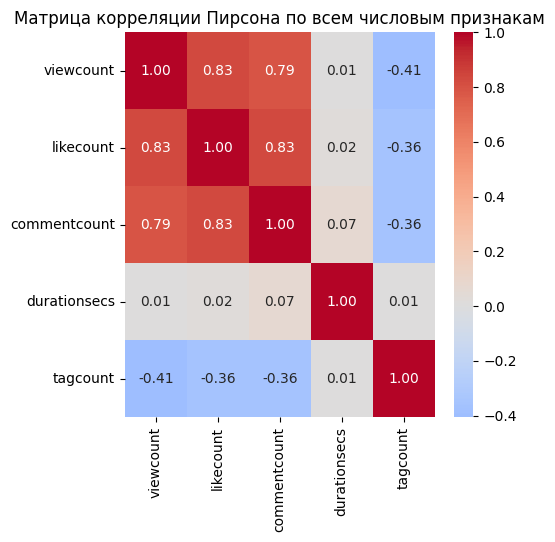

In [14]:
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Матрица корреляции Пирсона по всем числовым признакам')
plt.show()

Есть зависимость между количеством просмотров, лайков и комментариев, что указывает на взаимосвязанность метрик вовлеченности. Но у тегов (`tagcount`) корреляция с просмотрами (`viewcount`) -0,41, что вызывает вопросы. Рассмотрим этот феномен в статистическом анализе.

In [15]:
fig = px.scatter(
    df,
    x="durationsecs",
    y="viewcount",
    log_y=True,
    hover_name='title',
    hover_data={
        'durationsecs': True,
        'viewcount': True,
        'likecount': True,
        'commentcount': True,
        'tagcount': True
    },
    labels={
        'durationsecs': 'Длительность (сек)',
        'viewcount': 'Просмотры',
        'likecount': 'Лайки',
        'commentcount': 'Комментарии',
        'tagcount': 'Теги'
    },
    title="Длительность vs просмотры"
)
fig.show()

Длительность видео не показала явной зависимости с количеством просмотров: как короткие, так и многочасовые видео могут набирать значительный охват.

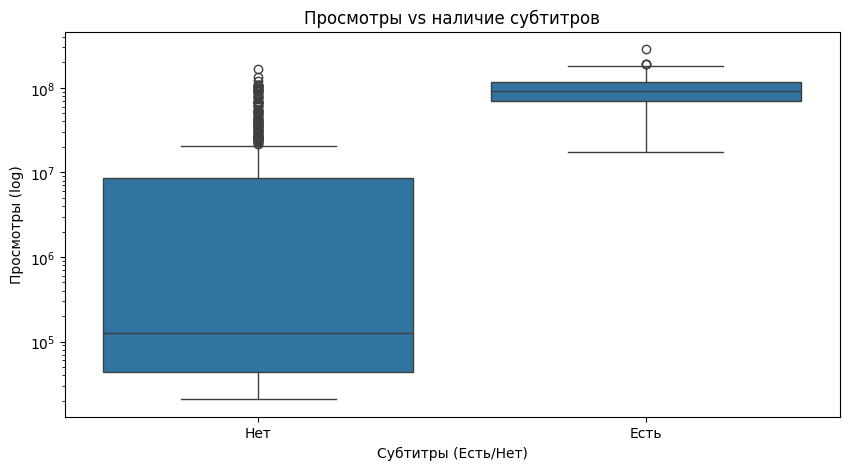

In [16]:
df['caption_label'] = df['caption'].map({True: 'Есть', False: 'Нет'})
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='caption_label', y='viewcount')
plt.yscale('log')
plt.title('Просмотры vs наличие субтитров')
plt.xlabel('Субтитры (Есть/Нет)')
plt.ylabel('Просмотры (log)')
plt.show()

In [17]:
caption_true_count = (df['caption'] == True).sum()
caption_false_count = (df['caption'] == False).sum()
print(f'Кол-во роликов с субтитрами: {caption_true_count}')
print(f'Кол-во роликов без субтитров: {caption_false_count}')

Кол-во роликов с субтитрами: 102
Кол-во роликов без субтитров: 625


По абсолютным просмотрам видео с субтитрами демонстрируют более высокую медиану. Но мы не можем утверждать, что наличие субтитров напрямую влияет на количество просмотров, так как выборка у обоих значений совершенно разная.

Посмотрим, совпадает ли день, в который чаще всего выкладываются ролики, с днем высоких просмотров.

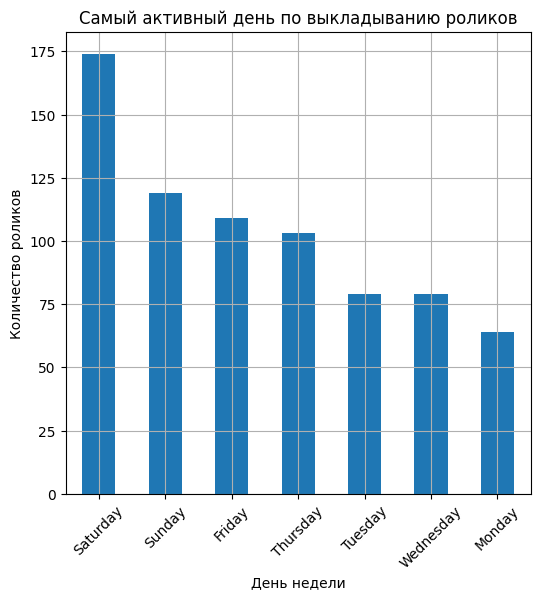

In [18]:
weekday_count = df.groupby('publishdayname')['video_id'].count().sort_values(ascending=False)
weekday = weekday_count.plot(kind='bar', figsize=(6,6))
plt.title('Cамый активный день по выкладыванию роликов')
plt.xlabel('День недели')
plt.ylabel('Количество роликов')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [19]:
print(weekday_count)

publishdayname
Saturday     174
Sunday       119
Friday       109
Thursday     103
Tuesday       79
Wednesday     79
Monday        64
Name: video_id, dtype: int64


Больше всего роликов выходит в субботу. Меньше всего - в понедельник.

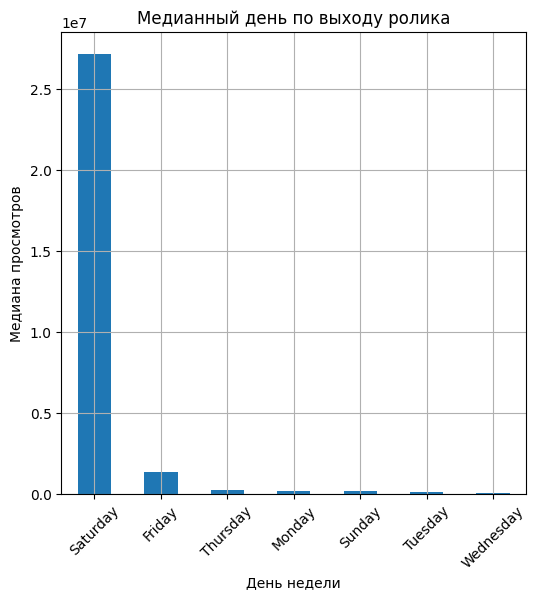

In [20]:
viewcount_median = df.groupby('publishdayname')['viewcount'].median().sort_values(ascending=False)
viewcount = viewcount_median.plot(kind='bar', figsize=(6,6))
plt.title('Медианный день по выходу ролика')
plt.xlabel('День недели')
plt.ylabel('Медиана просмотров')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [21]:
print(viewcount_median)

publishdayname
Saturday     27173097.5
Friday        1342981.0
Thursday       212835.0
Monday         163603.0
Sunday         157755.0
Tuesday        136799.0
Wednesday       65002.0
Name: viewcount, dtype: float64


Суббота является как наиболее частым днём публикации, так и днём с наибольшими медианными просмотрами. Это может указывать на то, что ролики выходят по расписанию и чаще всего в субботу, что позволяет зрителям строить планы на выходные. Также это может указывать на выход масштабных роликов.

**Вывод**:
1. Мы проверили несколько признаков на аномалию:
    - На канале блогера действительно есть видео с длительностью 15 секунд и 24 часа.
    - 61 тег мы увидеть не можем, они добавляются автором в настройках видео для поиска этого видео, рекомендаций, понимания темы алгоритмом. Для блогера крупного канала это нормально.
    - Видео по мотивам популярного сериала "Игра в кальмара" набрало больше всего (свыше 200 млн) просмотров из-за его масштаба и волны популярности. А ролику с наименьшим кол-вом просмотров (20 тыс.) "Advanced Warfare DLC 4 Honest Parody" уже 11 лет, в тот период такие масштабные ролики Mr Beast не снимал.
    - Что касается максимума просмотров, видео "Make This Video The Most Liked Video On Youtube" было успешным челленджем для YouTube, который набрал 20 млн лайков. А ролик с наименьшим количеством лайков (всего около 500) был выложен в формате voice-over gameplay, где игровой процесс используется как визуальный фон для монолога. Такой формат 11 лет назад не был популярен.
2. Есть зависимость между количеством просмотров, лайков и комментариев, что указывает на взаимосвязанность метрик вовлеченности. Но у тегов (`tagcount`) корреляция с просмотрами (`viewcount`) -0,41, что вызывает вопросы. Рассмотрим этот феномен в статистическом анализе.
3. Длительность видео не показала явной зависимости с количеством просмотров: как короткие, так и многочасовые видео могут набирать значительный охват.
4. По абсолютным просмотрам видео с субтитрами демонстрируют более высокую медиану. Но мы не можем утверждать, что наличие субтитров напрямую влияет на количество просмотров, так как выборка у обоих значений совершенно разная.
5. Суббота является как наиболее частым днём публикации, так и днём с наибольшими медианными просмотрами. Это может указывать на то, что ролики выходят по расписанию и чаще всего в субботу, что позволяет зрителям строить планы на выходные. Также это может указывать на выход масштабных роликов.

### **Формирование продуктовых метрик**

Для оценки эффективности контента мы рассчитаем относительные метрики вовлечённости.
В отличие от абсолютных значений просмотров, относительные метрики позволяют оценить качество взаимодействия аудитории с видео.

- Like Rate — доля пользователей, поставивших лайк
- Comment Rate — доля пользователей, оставивших комментарий
- Engagement Rate — совокупная вовлечённость

In [22]:
df['like_rate'] = df['likecount'] / df['viewcount']
df['comment_rate'] = df['commentcount'] / df['viewcount']
df['engagement_rate'] = (df['likecount'] + df['commentcount']) / df['viewcount']

In [23]:
df[['like_rate', 'comment_rate', 'engagement_rate']].describe()

,like_rate,comment_rate,engagement_rate
count,720.000000,726.000000,719.000000
mean,0.034579,0.004543,0.039081
std,0.016960,0.004761,0.020148
min,0.007582,0.000473,0.008967
25%,0.024842,0.001478,0.027147
50%,0.031229,0.003589,0.036069
75%,0.040493,0.006051,0.045967
max,0.271468,0.084768,0.356236


В среднем около 3,6% зрителей оставляют реакцию (лайк и комментарий). Максимум мы видим 35% вовлеченности, на это могло повлиять видео-челлендж с самым залайканным видео на YouTube.

**Вывод**:

1. Для оценки эффективности видео были рассчитаны относительные метрики вовлечённости.
В отличие от абсолютных показателей (просмотры, лайки), относительные метрики позволяют оценить качество взаимодействия аудитории с контентом.

Были рассчитаны следующие показатели:
- Like Rate — отношение количества лайков к просмотрам
- Comment Rate — отношение количества комментариев к просмотрам
- Engagement Rate — суммарная вовлечённость (лайки + комментарии) к просмотрам.

2. В среднем около 3,6% зрителей оставляют реакцию (лайк и комментарий). Максимум мы видим 35% вовлеченности, на это могло повлиять видео-челлендж с самым залайканным видео на YouTube.

### **Статистический анализ**

Мы посмотрим распределение вовлеченности аудитории на гистограмме.

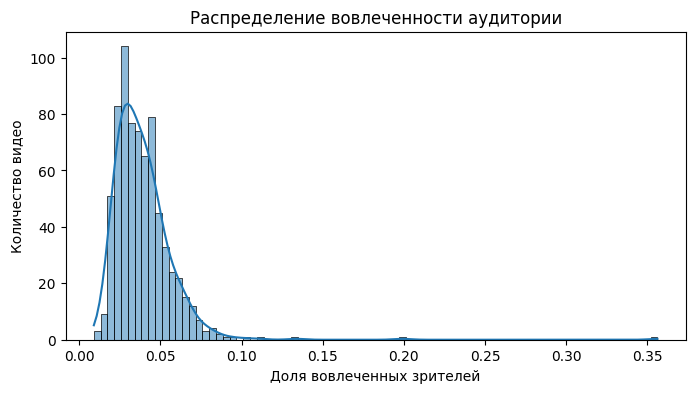

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(df['engagement_rate'], kde=True)
plt.title('Распределение вовлеченности аудитории')
plt.xlabel('Доля вовлеченных зрителей')
plt.ylabel('Количество видео')
plt.show()

Как мы видим, распределение ненормальное - правый хвост очень длинный. Мы проверим гипотезу о различии вовлеченности у видео с субтитрами с помощью теста Манна-Уитни, потому как распределение метрики асимметричное, есть выбросы, которые не можем исключить, и мы будем сравнивать две независимые выборки.

### **Гипотеза 1**. Влияют ли субтитры на вовлеченность аудитории

- H0: медианный engagement_rate одинаков у видео с субтитрами и без субтитров.
- H1: медианный engagement_rate различается у видео с субтитрами и без субтитров.

In [25]:
subtitles = df[df['caption'] == True]['engagement_rate'].dropna()
no_subtitles = df[df['caption'] == False]['engagement_rate'].dropna()

print(len(subtitles))
print(len(no_subtitles))

102
617


In [26]:
alpha = 0.05
results = st.mannwhitneyu(subtitles, no_subtitles, alternative='two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 9.436781450008416e-05
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу, тест Манна-Уитни показал статистически значимое различие в вовлеченности между видео с субтитрами и без них (p-value < 0.00009436). При анализе относительной метрики engagement_rate ролики без субтитров показывают более высокий медианный уровень вовлеченности.

Mr Beast часто публикует масштабные ролики в субботу, проверим, вызывают ли они более высокую вовлеченность.

### **Гипотеза 2**. Влияет ли день недели на вовлеченность

- H0: медианный engagement_rate одинаков для видео, опубликованных в субботу и в другие дни
- H1: медианный engagement_rate различается.

In [27]:
saturday = df[df['publishdayname'] == 'Saturday']['engagement_rate'].dropna()
not_saturday = df[df['publishdayname'] != 'Saturday']['engagement_rate'].dropna()

print(len(saturday))
print(len(not_saturday))

172
547


Проверим гипотезу так же критерием Манна-Уитни, так как мы берем две независимые выборки, и метрика асимметрична.

In [28]:
alpha = 0.05
result = st.mannwhitneyu(saturday, not_saturday, alternative='two-sided')

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.009575986824723833
Отвергаем нулевую гипотезу


Тест показал, что статистически значимое различие есть в engagement_rate между видео, опубликованным в субботу, и видео, опубликованными в другие дни (p-value - 0.0095). Нулевая гипотеза отвергается. Ролики, опубликованные в субботу, имеют более высокий уровень вовлеченности по сравнению с другими днями.

В исследовательском анализе данных мы выявили корреляцию -0,41 у тегов (`tagcount`) с просмотрами (`viewcount`). Проверим этот феномен с помощью критерия Пирсона, чтобы убедиться, случайность это или нет.

### **Гипотеза 3**. Есть ли связь между количеством тегов и количеством просмотров

- H0: между количеством тегов и количеством просмотров отсутствует связь
- H1: между количеством тегов и количеством просмотров есть связь.

In [29]:
temp = df[['tagcount', 'viewcount']].dropna()

alpha = 0.05
resulte = st.pearsonr(temp['tagcount'], temp['viewcount'])

print('p-значение:', resulte.pvalue)

if resulte.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.046613310001867e-30
Отвергаем нулевую гипотезу


Проверка корреляции Пирсона показала статистически значимую отрицательную связь между количеством тегов и числом просмотров (p-value < 0.001). Это значит, что в выборке видео с большим числом тегов в среднем имеют меньше просмотров. Но мы не можем утверждать, что это напрямую влияет на охват. Это может быть связано с временными или стратегическими факторами развития канала.

**Вывод**:

Проведенные тесты показали, что:
- Наличие субтитров связано с различием в уровне вовлеченности аудитории, но причинно-следственную связь установить нельзя.
- День публикации также связан с уровнем вовлеченности, что демонстрируют субботние видео. 
- Видео с большим числом тегов в среднем имеют меньше просмотров. Но мы не можем утверждать, что это напрямую влияет на охват. Это может быть связано с временными или стратегическими факторами развития канала.

Анализ носит наблюдательный характер, поэтому мы не можем делать выводы о причинном влиянии факторов.

# **Вывод**

В рамках проекта был проведен анализ контента YouTube канала MrBeast с целью выявления факторов, связанных с уровнем вовлеченности аудитории и высокими просмотрами:
1. Подготовка данных:
    - Данные включали 727 видео.
    - Была выполнена предобработка: удалены нерелевантные столбцы, приведены типы данных, стандартизированы названия колонок, проверены дубликаты и пропуски. Существенных искажений, влияющих на анализ, выявлено не было.
2. Результаты исследовательского анализа:
    - Метрики просмотров, лайков и комментариев демонстрируют высокую положительную взаимосвязь, что ожидаемо для контентных платформ.
    - Длительность видео не показала явной зависимости с количеством просмотров: как короткие, так и многочасовые видео могут набирать значительный охват.
    - По абсолютным просмотрам видео с субтитрами демонстрируют более высокую медиану, однако из-за дисбаланса выборок нельзя делать вывод о прямом влиянии данного фактора.
    - Суббота является наиболее частым днём публикации и характеризуется высокими медианными просмотрами, что может свидетельствовать о стратегическом выборе даты для выпуска масштабного контента.


3. Продуктовые метрики:

    Для более корректной оценки эффективности были рассчитаны относительные метрики вовлечённости:
    - Like Rate
    - Comment Rate
    - Engagement Rate
    
    Средний engagement_rate составил около 3,6%, что отражает долю зрителей, взаимодействующих с видео после просмотра.

4. Статистический анализ:
    
    Проверка гипотез показала:
    - Наличие субтитров связано с различием в уровне вовлеченности аудитории, но причинно-следственную связь установить нельзя.
    - День публикации также связан с уровнем вовлеченности, что демонстрируют субботние видео. 
    - Видео с большим числом тегов в среднем имеют меньше просмотров. Но мы не можем утверждать, что это напрямую влияет на охват. Это может быть связано с временными или стратегическими факторами развития канала.

Проведённый анализ показал, что вовлечённость аудитории связана с рядом контентных и временных факторов. Наиболее выраженные различия выявлены для признаков «наличие субтитров» и «день публикации». Длительность видео не продемонстрировала значимой связи с эффективностью контента.